In [1]:
import sys
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from shapely import LineString
sys.path.append(os.path.abspath('../raw_to_map'))
from sfkb_to_image_coordinates.sfkb_to_graph_dup import get_camera_extrinsics
from sfkb_to_image_coordinates.utils import load_json_building_by_id, plot_image
from im_to_im import epipolar_line, line


In [13]:
building_path = '../AgderOst/buildings_transformed'
iid1 = '14583_01_004_20020'
iid2 = '14583_02_004_20013'
buildings = list()
for id in os.listdir(building_path):
    building = load_json_building_by_id(building_path, id.split('.')[0])
    if all(iid in building['corners'] for iid in (iid1, iid2)):
        buildings.append(building)
print (len(buildings))
    


124


In [ ]:
means1, means2 = list(), list()
for building in buildings:
    means1.append(np.mean(np.array(list(building['corners'][iid1])), axis=0))
    means2.append(np.mean(np.array(list(building['corners'][iid2])), axis=0))
epipolar_coeffs = epipolar_line(means1, iid1, iid2)


In [ ]:
def coeffs_to_line(coeffs):

(124, 124, 124)

(17000.0, 25000.0)

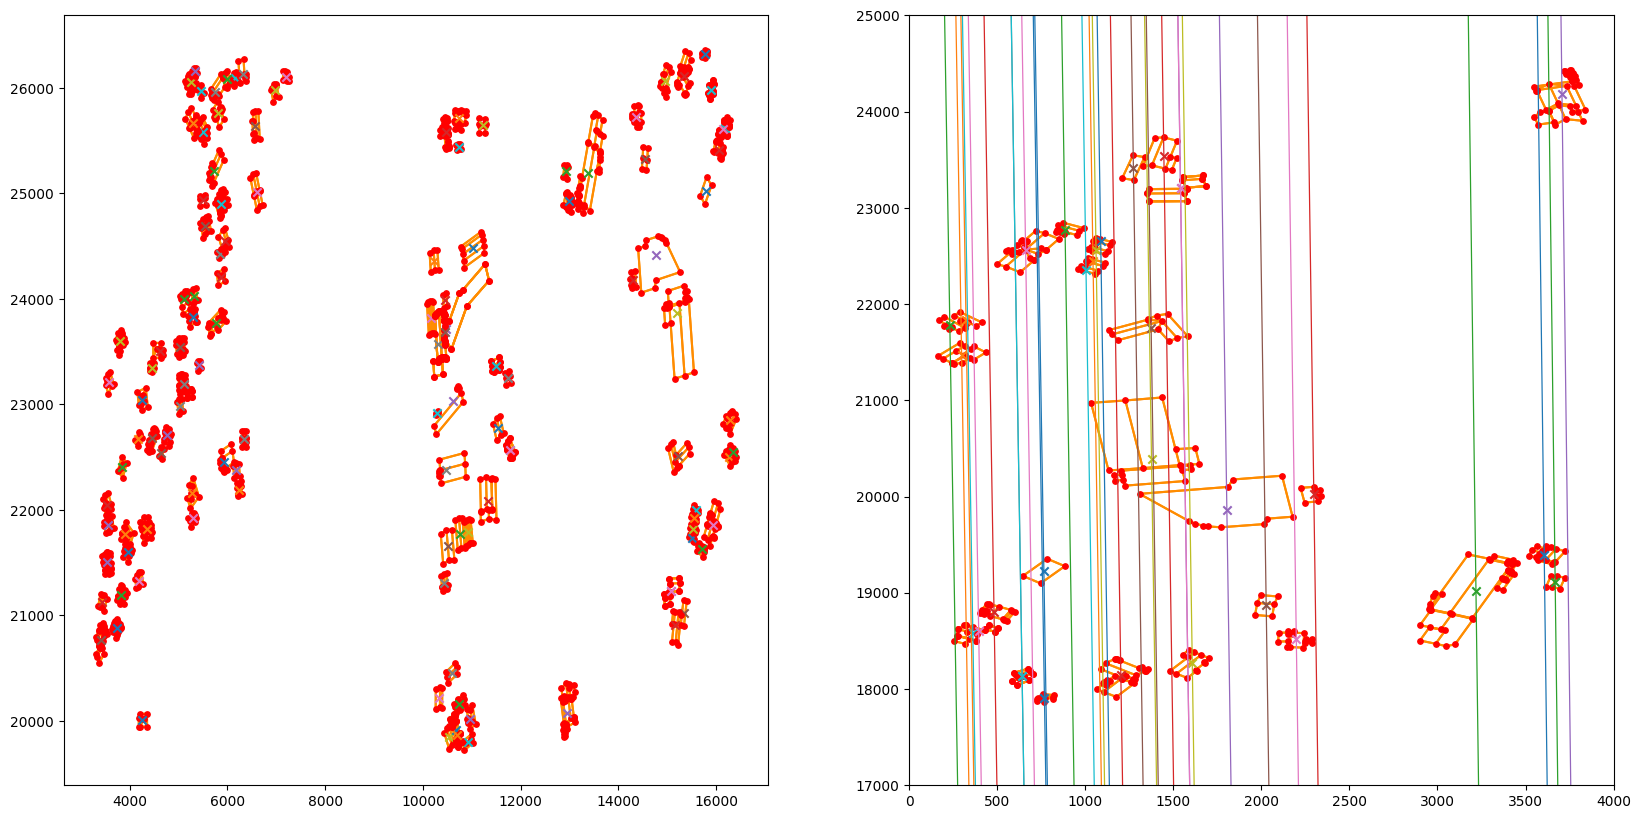

In [53]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
x = np.linspace(0, 14000, 100)  
for i, building in enumerate(buildings):
    plot_image(building, iid1, axs[0])
    axs[0].scatter(*means1[i], marker='x')
    plot_image(building, iid2, axs[1])
    axs[1].scatter(*means2[i], marker='x')

    a, b, c = epipolar_coeffs[i]
    epiline = line(a, b, c, x)
    axs[1].plot(x, epiline, lw=0.9)    
axs[1].set_xlim(0, 4000)
axs[1].set_ylim(17000, 25000)

(22605.0, 22690.0)

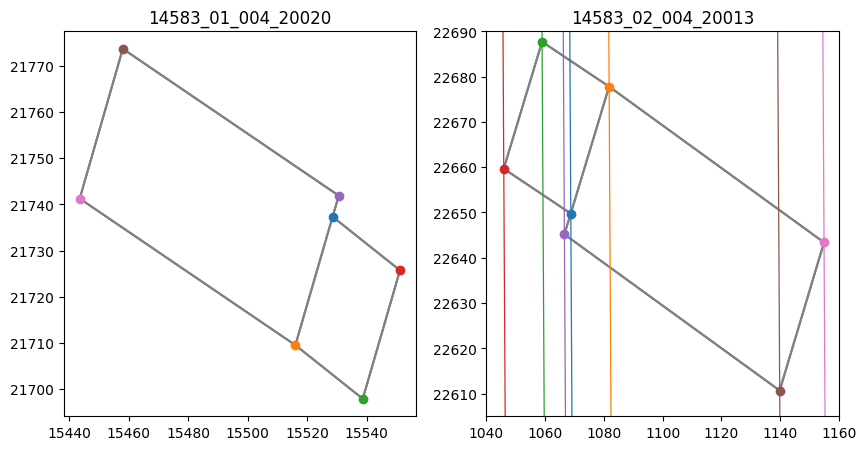

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
x1 = np.linspace(15440, 15540, 100)
x2 = np.linspace(50, 1160, 100)

plot_image(building, iid1, axs[0], edge_color='grey')
plot_image(building, iid2, axs[1], edge_color='grey')

points = building['corners'][iid1]
coeffs = epipolar_line(points, iid1, iid2)

for i, [pt, cf] in enumerate(zip(points, coeffs)):
    a, b, c = cf
    el = line(a, b, c, x2)

    axs[0].scatter(*points[i])
    axs[1].scatter(*building['corners'][iid2][i])

    axs[1].plot(x2, el, lw=0.9)

axs[0].set_title(iid1)
axs[1].set_title(iid2)
axs[1].set_xlim(1040, 1160)
axs[1].set_ylim(22605, 22690)